In [3]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('Online_Retail.csv', encoding='windows-1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:

missing_values = df.isnull().sum()
print(missing_values)
columns_with_missing_values = missing_values[missing_values > 0].index
print(f"Columns with missing values: {list(columns_with_missing_values)}")


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Columns with missing values: ['Description', 'CustomerID']


In [5]:
missing_values_after = df.isnull().sum()
print(missing_values_after)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Step 2.2

1.Other methods include filling missing values with the median, mode, or nearby values using forward or backward fill. In some cases, predictive models can also be used to estimate the missing data.

2.The choice depends on the type and importance of the data for numerical columns, mean or median works best, while for categorical data, the mode or a placeholder like “Unknown” is more appropriate.

In [15]:
negative_quantity = df[df['Quantity'] < 0]

print("Rows with negative Quantity:")
print(negative_quantity)

Rows with negative Quantity:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate  UnitPrice  CustomerID         Country  \
141      12/1/10 9

Negative Quantity rows indicate product returns or cancellations. We can either remove them to focus on actual sales transactions or store them separately for analyzing return patterns.In this dataset, it’s better to remove them so the analysis reflects only valid sales data.

Step 2.4

While exploring the dataset, I looked at its structure, column names, and data types to get a clear idea of the information it contains. I checked for missing values, outliers, and negative quantities that could affect the results. Missing data was either filled or removed based on how important it was, and negative quantities were dropped since they represented returns. These steps helped make the dataset cleaner, more consistent, and ready for proper analysis.

In [7]:
print("\nDataFrame info():")
print(df.info())

print("\nBasic statistics for numeric columns:")
print(df.describe())



DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Basic statistics for numeric columns:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64


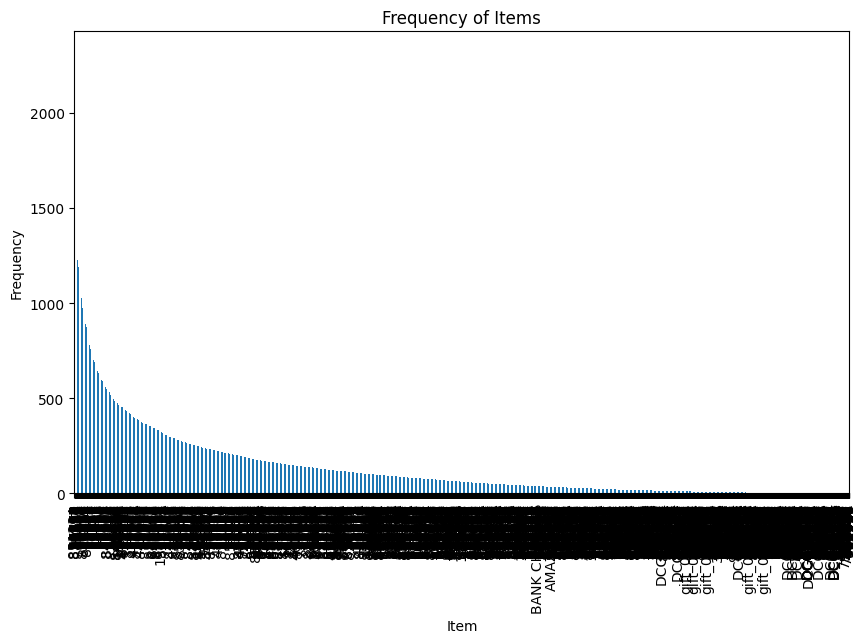

In [9]:
from matplotlib import pyplot as plt
item_frequencies = df['StockCode'].value_counts()
item_frequencies.plot(kind='bar', figsize=(10, 6), title='Frequency of Items')
print(item_frequencies)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.show()

Too many bars: There are just way too many items on the chart, so the x-axis turns into a wall of sticks and unreadable labels.

No focus on what matters: Even if it’s technically sorted, showing everything at once makes it hard to spot which items are actually popular vs. niche.

Overlapping labels: The item names pile on top of each other, so you can’t read anything—even with rotation.

No sense of scale: The biggest items dwarf the rest, so you can’t tell how fast the frequencies drop or how the smaller ones compare.

To improve it, we can display only the top 10 or 20 most frequent items instead of all items.

/tmp/ipython-input-2620294000.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['InvoiceDate'])


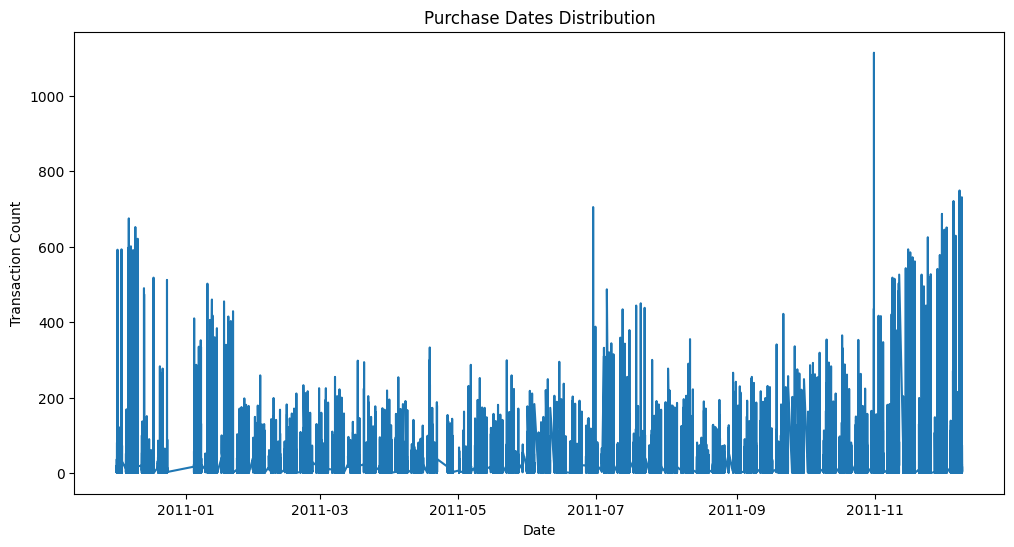

In [11]:
df['date'] = pd.to_datetime(df['InvoiceDate'])
plt.figure(figsize=(12, 6))
plt.plot(df['date'].value_counts().sort_index())
plt.title('Purchase Dates Distribution')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

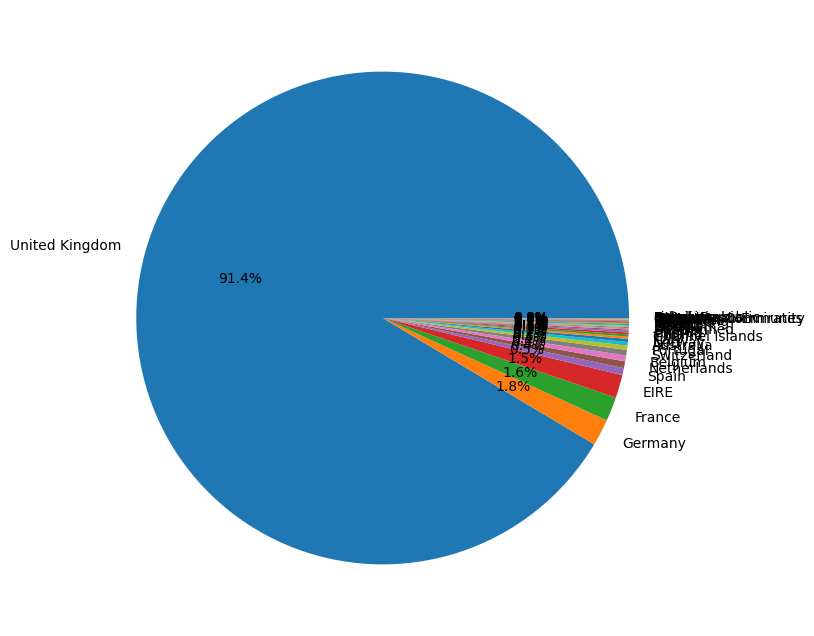

In [12]:
country_distribution = df['Country'].value_counts()
country_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()

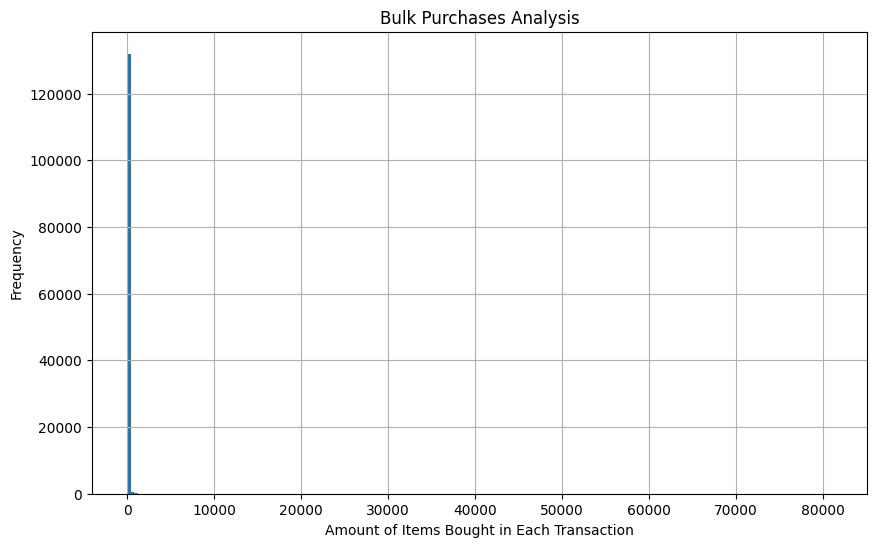

In [14]:
bulk_purchase_threshold = 10
bulk_purchases = df[df['Quantity'] > bulk_purchase_threshold]
bulk_purchases['Quantity'].hist(bins=200, figsize=(10, 6))
plt.title('Bulk Purchases Analysis')
plt.xlabel('Amount of Items Bought in Each Transaction')
plt.ylabel('Frequency')
plt.show()

The plot looks skewed because most transactions involve very few items, while a few rare cases have extremely large quantities these outliers stretch the x-axis, making the rest of the data appear compressed.

We can make the plot clearer by showing only reasonable quantities up to 100 or 500 or using a log scale on the x-axis. This helps highlight normal purchase patterns instead of being dominated by a few extreme bulk orders.

Step 3.5

While exploring further, I noticed that most sales come from the United Kingdom, and only a few countries have smaller contributions. Some products are bought in large quantities quite often, showing they’re customer favorites. Sales also seem to increase during certain months, hinting at seasonal buying trends. These patterns can help businesses focus on popular products and plan stock more effectively.